In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/5/Lena.bmp", 0)

Text(0.5, 1.0, 'Pyramid: Wavelet')

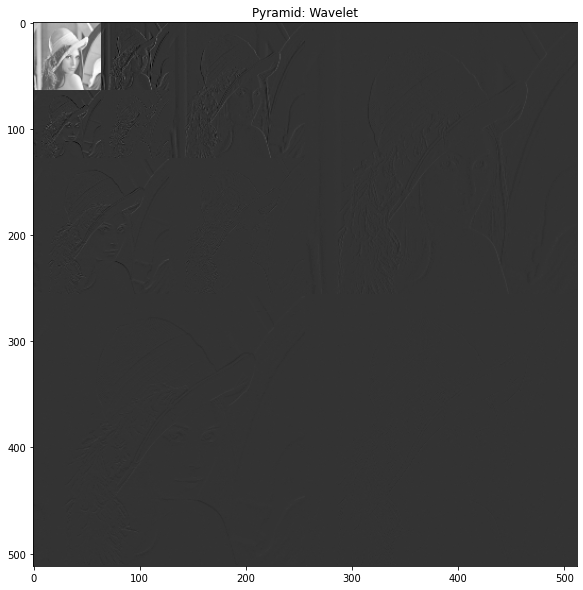

In [ ]:
levels = pywt.wavedec2(img, 'haar', mode='periodization', level=3)
wavelet_pyramid, coefficents = pywt.coeffs_to_array(levels)

fig, plot = plt.subplots(1, 1, figsize = (10, 10))

plot.imshow(wavelet_pyramid, cmap='gray')
plot.set_title("Pyramid: Wavelet")

In [37]:
def get_resolution_levels(wavelet_pyramid, levels):
  R, C = wavelet_pyramid.shape
  resolution_levels = []

  for level in range(levels):
    resolution_level = np.full((R, C), 255)
    resolution_level[0:R//(2**level), 0:C//(2**level)] = wavelet_pyramid[0:R//(2**level), 0:C//(2**level)]
    resolution_levels.append(resolution_level)
  
  return resolution_levels

Text(0.5, 1.0, 'Resolution Level: 1')

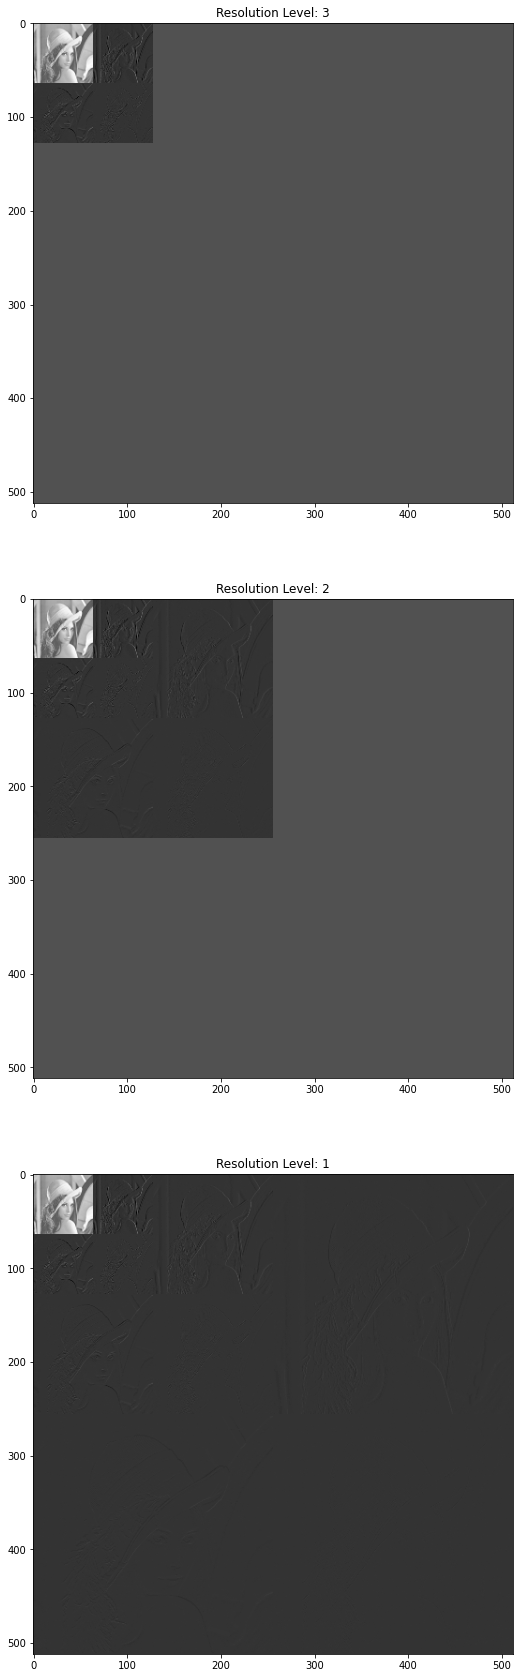

In [38]:
resolution_levels = get_resolution_levels(wavelet_pyramid, 3)

fig, plot = plt.subplots(3, 1, figsize = (10, 30))

plot[0].imshow(resolution_levels[2], cmap='gray')
plot[0].set_title("Resolution Level: 3")

plot[1].imshow(resolution_levels[1], cmap='gray')
plot[1].set_title("Resolution Level: 2")

plot[2].imshow(resolution_levels[0], cmap='gray')
plot[2].set_title("Resolution Level: 1")